In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Prajna/Desktop/Loan_Predict/train.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.drop(['Loan_ID'],axis =1,inplace=True)

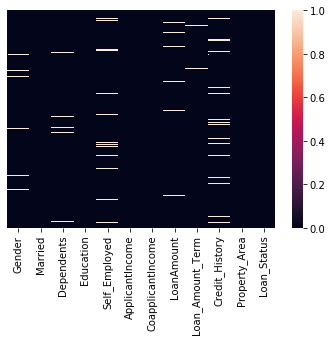

In [6]:
sns.heatmap(df.isnull(),yticklabels= False, cbar = True)

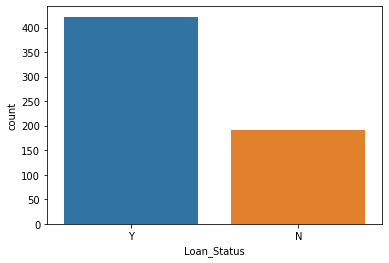

In [7]:
sns.countplot(x='Loan_Status',data = df)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 40.8+ KB


In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
print(df.Gender.unique())
print(df.Married.unique())
print(df.Dependents.unique())
print(df.Self_Employed.unique())
print(df.LoanAmount.unique())
print(df.Loan_Amount_Term.unique())
print(df.Credit_History.unique())

['Male' 'Female' nan]
['No' 'Yes' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 246. 500. 186. 119. 107. 209. 208. 243

In [11]:
print(df.Education.unique())
print(df.Property_Area.unique())

['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']


In [12]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())

In [14]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education']=le.fit_transform(df['Education'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,0,No,5849,0.0,146.412162,360.0,1.0,2,Y
1,Male,Yes,1,0,No,4583,1508.0,128.000000,360.0,1.0,0,N
2,Male,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1.0,2,Y
3,Male,Yes,0,1,No,2583,2358.0,120.000000,360.0,1.0,2,Y
4,Male,No,0,0,No,6000,0.0,141.000000,360.0,1.0,2,Y


In [16]:
le1 = LabelEncoder()
df['Loan_Status']=le1.fit_transform(df['Loan_Status'])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,0,No,5849,0.0,146.412162,360.0,1.0,2,1
1,Male,Yes,1,0,No,4583,1508.0,128.000000,360.0,1.0,0,0
2,Male,Yes,0,0,Yes,3000,0.0,66.000000,360.0,1.0,2,1
3,Male,Yes,0,1,No,2583,2358.0,120.000000,360.0,1.0,2,1
4,Male,No,0,0,No,6000,0.0,141.000000,360.0,1.0,2,1


In [17]:
df1 = pd.get_dummies(df['Gender'],drop_first=True)
df.drop(['Gender'],axis=1,inplace=True)
df1.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [18]:
df2 = pd.get_dummies(df['Married'],drop_first=True)
df.drop(['Married'],axis=1,inplace=True)
df2.head()

,Yes
0,0
1,1
2,1
3,1
4,0


In [19]:
df3 = pd.get_dummies(df['Dependents'],drop_first=True)
df.drop(['Dependents'],axis=1,inplace=True)
df3.head()

,1,2,3+
0,0,0,0
1,1,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [20]:
df4 = pd.get_dummies(df['Self_Employed'],drop_first=True)
df.drop(['Self_Employed'],axis=1,inplace=True)
df4.head()

,Yes
0,0
1,0
2,1
3,0
4,0


In [21]:
df=pd.concat([df1,df2,df3,df4,df],axis=1)

In [22]:
df.head()

,Male,Yes,1,2,3+,Yes,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,0,1,0,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,0,1,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [23]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head(5)

,Male,Yes,1,2,3+,Yes,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,0,1,0,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,0,0,0,1,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2


In [24]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[16 17]
 [ 3 87]]
Accuracy: 0.8373983739837398
Precision: 0.8380319936802607
Recall: 0.8373983739837398
F1 score: 0.8213767625384423


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [31]:
y_pred = rfc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print ('Accuracy:', accuracy_score(y_test, y_pred))
print ('Precision:', precision_score(y_test, y_pred,average='weighted'))                                   
print ('Recall:', recall_score(y_test, y_pred,average='weighted'))
print ('F1 score:', f1_score(y_test, y_pred,average='weighted'))

[[15 18]
 [ 7 83]]
Accuracy: 0.7967479674796748
Precision: 0.7842308621106012
Recall: 0.7967479674796748
F1 score: 0.7822755714468139


In [33]:
df.shape

(614, 14)

In [34]:
# Collecting the test data to be predicted
test_df=pd.read_csv('C:/Users/Prajna/Desktop/Loan_Predict/new_test.csv')

In [35]:
test_df.shape

(367, 13)

In [36]:
test_df = sc.transform(test_df)

In [37]:
y_pred = classifier.predict(test_df)

In [38]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [39]:
y_pred = le1.inverse_transform(y_pred)
y_pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [40]:
##Create Sample Submission file and Submit using XgBOOST
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('C:/Users/Prajna/Desktop/Loan_Predict/sample_submission.csv')
datasets=pd.concat([sub_df['Loan_ID'],pred],axis=1)
datasets.columns=['Loan_ID','Loan_Status']
datasets.to_csv('C:/Users/Prajna/Desktop/Loan_Predict/sample_submission.csv',index=False)